In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import uproot
import pandas as pd
import umap
from sklearn.preprocessing import StandardScaler
import HomeMade as hm
from sklearn.decomposition import PCA
import xgboost as xgb

In [160]:
N = 1e5

all_features = "v0_ks_mass v0_ks_massErr v0_la_mass v0_lb_mass v0_la_massErr v0_lb_massErr pv0_x pv0_y pv0_z a0xy a0 a0z cosTheta v0_chi2 \
v0_x v0_y v0_z v0_rxy v0_rxyErr v0_px v0_py v0_pz v0_pt v0_p \
v0_ptErr \
v0_px1 v0_py1 v0_pz1 v0_pt1 \
v0_p1 v0_px2 v0_py2 v0_pz2 v0_pt2 v0_p2 v0_phi1 v0_theta1 \
v0_qOverP1 v0_phi2 v0_theta2 v0_qOverP2 alpha calpha epsilon1 \
epsilon2 Alpha pL1 pL2 pT thetastar rapidity_ks pseudorapidity".split(" ")

path = "data/data15_13TeV.00267358.physics_MinBias.30062015_v0_per_0.root"
file = uproot.open(path)
data = file['tree'].pandas.df(all_features, entrystop = N)

path = "data/mc15_13TeV.361203.Pythia8_A2_MSTW2008LO_ND_minbias.30062015_v0_per_0.root"
file = uproot.open(path)
mc = file['tree'].pandas.df(all_features + ['trueKs','trueLa','trueLb'], entrystop = N)

# data = data.loc[(data.v0_ks_mass > 400) & (data.v0_ks_mass < 600)]
# mc = mc.loc[(mc.v0_ks_mass > 400) & (mc.v0_ks_mass < 600)].reset_index(drop=True)

In [5]:
feats = "a0xy a0 v0_x v0_y v0_px v0_py v0_pz v0_p v0_ptErr \
v0_px1 v0_py1 v0_pz1 v0_pt1 v0_p1 v0_px2 v0_py2 v0_pz2 v0_pt2 v0_p2 v0_phi1 v0_theta1 \
v0_qOverP1 v0_phi2 v0_theta2 v0_qOverP2 epsilon1 epsilon2 pL1 pL2 pT rapidity_ks".split(" ")

In [12]:
yumap = umap.UMAP()
scaler = StandardScaler()

emb_mc = yumap.fit_transform(scaler.fit_transform(mc[feats]),y=mc.trueKs)

C:\Users\jv97\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


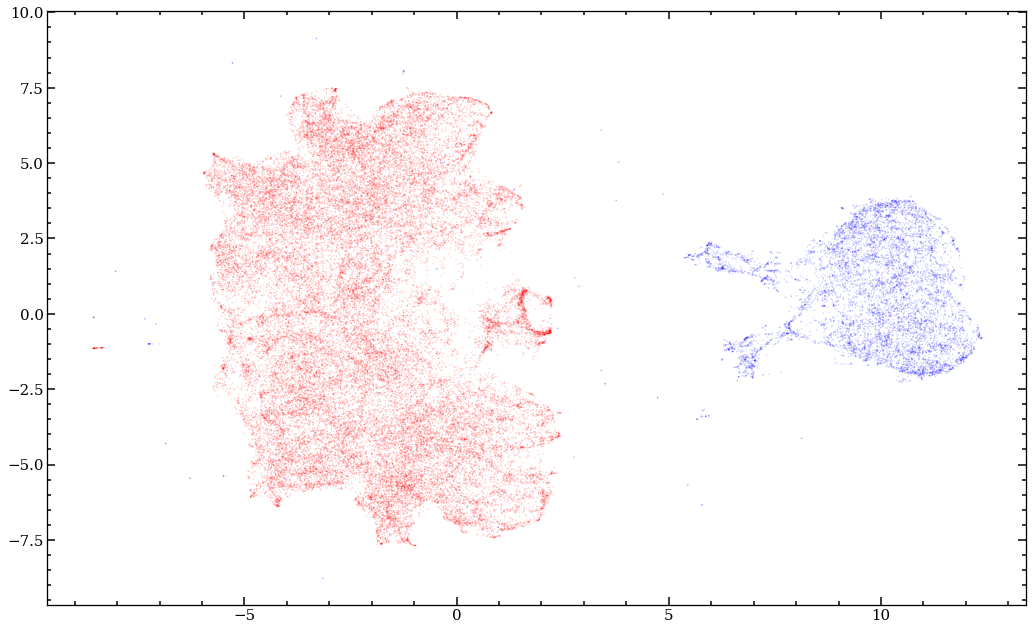

In [26]:
fig, ax = plt.subplots(figsize=(16,10))

pca_emb = PCA().fit_transform(emb_mc)
x,y = pca_emb[:,0], pca_emb[:,1]

# x,y = emb_mc[:,0],emb_mc[:,1]

ax.scatter(x,y,s=0.2,alpha=0.2,c=mc.trueKs,cmap=matplotlib.colors.ListedColormap(['red','blue']))

In [27]:
emb = yumap.transform(scaler.transform(data[feats]))

C:\Users\jv97\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 124:
    @numba.njit(parallel=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  self.func_ir.loc))
C:\Users\jv97\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 135:
    @numba.njit(parallel=True)
  

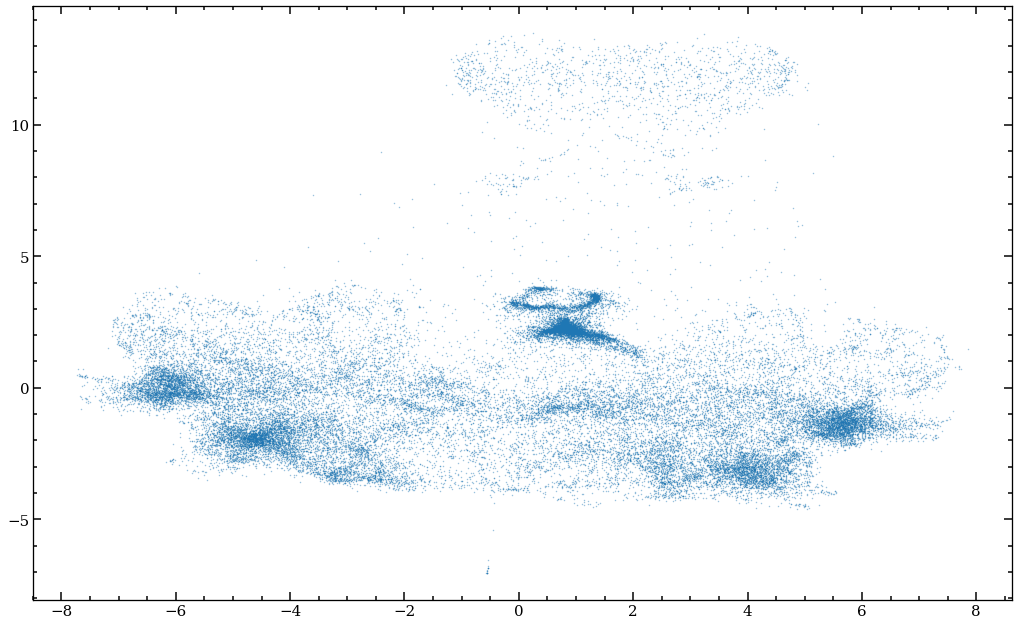

In [31]:
fig, ax = plt.subplots(figsize=(16,10))

pca_emb = PCA().fit_transform(emb)
x,y = pca_emb[:,0], pca_emb[:,1]

# x,y = emb[:,0],emb[:,1]

ax.scatter(x,y,s=0.2,alpha=0.5,cmap=matplotlib.colors.ListedColormap(['red','blue']))

No valid minimum found!
Completed fit with Chi2: 61.3, p-val: 0.152 and the total amount of signal 1747 +/- 1, background: 39344
Completed fit with Chi2: 62.5, p-val: 0.130 and the total amount of signal 947 +/- 88, background: 38969
Completed fit with Chi2: 64.9, p-val: 0.091 and the total amount of signal 644 +/- 73, background: 38099
Completed fit with Chi2: 61.7, p-val: 0.144 and the total amount of signal 597 +/- 119, background: 36972
Completed fit with Chi2: 67.6, p-val: 0.060 and the total amount of signal 546 +/- 170, background: 35848
Completed fit with Chi2: 69.0, p-val: 0.048 and the total amount of signal 524 +/- 148, background: 34697
Completed fit with Chi2: 70.2, p-val: 0.039 and the total amount of signal 504 +/- 82, background: 33543
Completed fit with Chi2: 70.8, p-val: 0.035 and the total amount of signal 523 +/- 109, background: 32349
Completed fit with Chi2: 71.1, p-val: 0.033 and the total amount of signal 475 +/- 143, background: 31224
No valid minimum found!
Co

(-0.1609982976839116,
 array([    0,  1174,  2348,  3522,  4696,  5870,  7044,  8218,  9392,
        10566, 11740, 12914, 14088, 15262, 16436, 17610, 18784, 19958,
        21132, 22306, 23480, 24654, 25828, 27002, 28176, 29350, 30524,
        31698, 32872, 34046, 35220, 36394, 37568, 38742, 39916]))

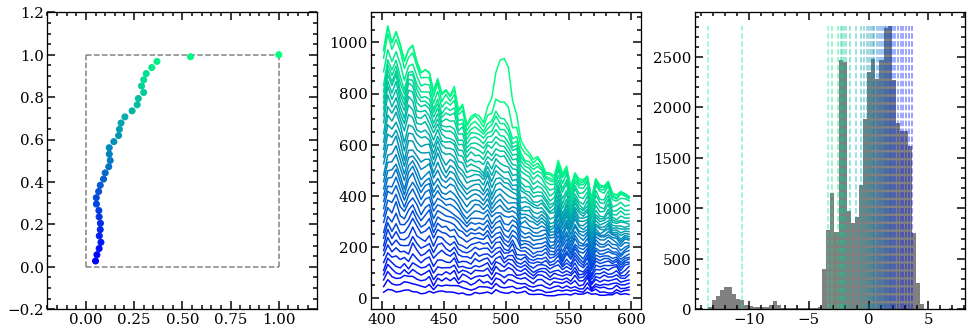

In [39]:
import importlib 
hm = importlib.reload(hm)

fig, ax = plt.subplots(ncols=3,figsize=(15,5))
hm.roc_curve_data(data.v0_ks_mass,-y,bins=60,Npoints=35,ax_roc=ax[0],ax_fits=ax[1],ax_hist=ax[2])

In [40]:
yumap = umap.UMAP(n_components = len(feats))
scaler = StandardScaler()

emb_mc = yumap.fit_transform(scaler.fit_transform(mc[feats]),y=mc.trueKs)

C:\Users\jv97\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


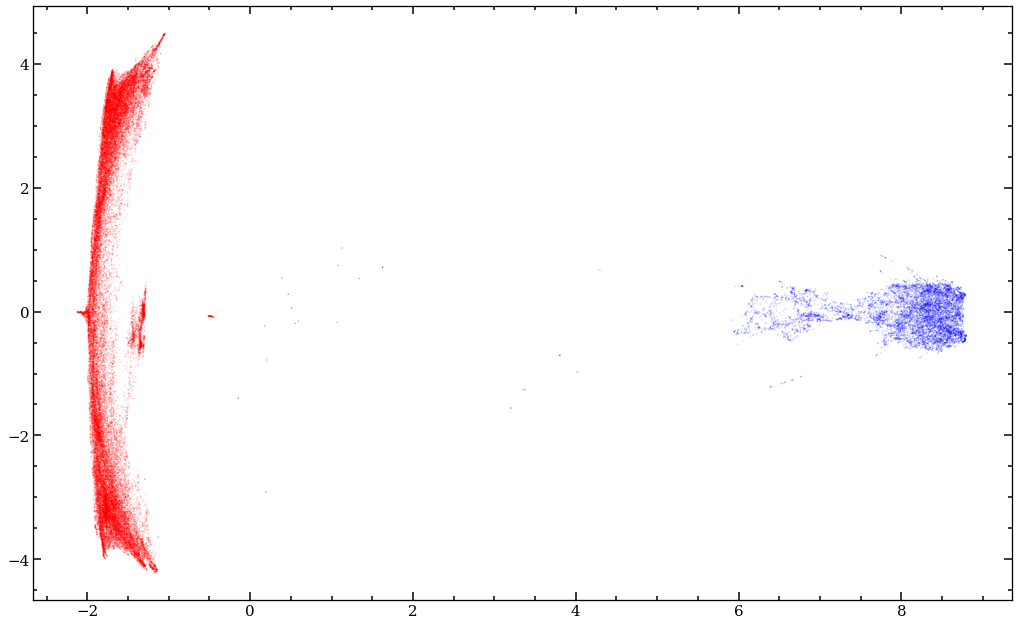

In [41]:
fig, ax = plt.subplots(figsize=(16,10))

pca_emb = PCA().fit_transform(emb_mc)
x,y = pca_emb[:,0], pca_emb[:,1]

# x,y = emb_mc[:,0],emb_mc[:,1]

ax.scatter(x,y,s=0.2,alpha=0.2,c=mc.trueKs,cmap=matplotlib.colors.ListedColormap(['red','blue']))

In [42]:
emb = yumap.transform(scaler.transform(data[feats]))

C:\Users\jv97\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 124:
    @numba.njit(parallel=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  self.func_ir.loc))
C:\Users\jv97\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 135:
    @numba.njit(parallel=True)
  

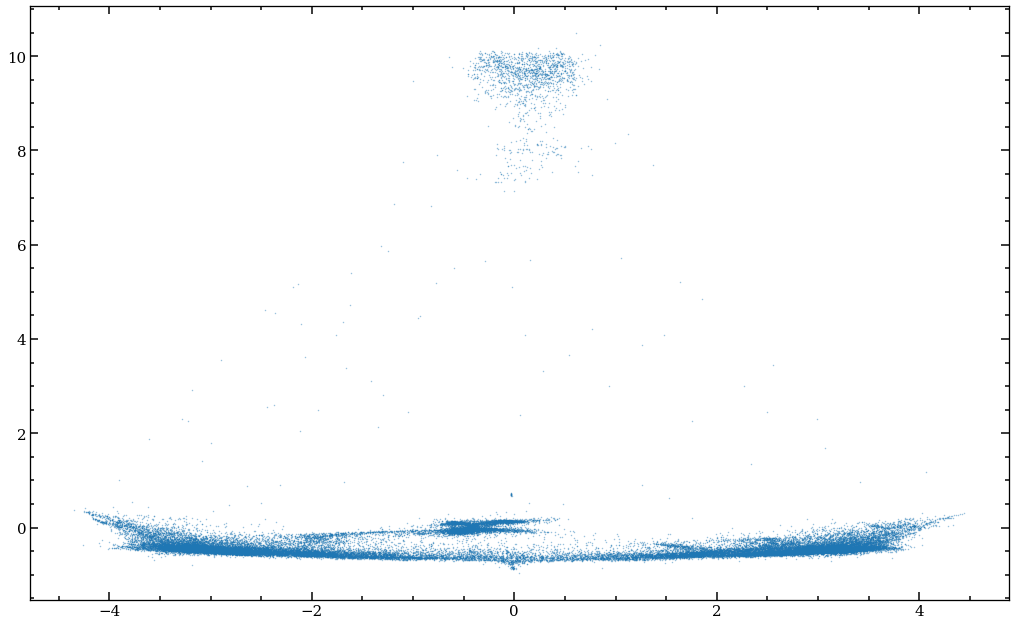

In [43]:
fig, ax = plt.subplots(figsize=(16,10))

pca_emb = PCA().fit_transform(emb)
x,y = pca_emb[:,0], pca_emb[:,1]

# x,y = emb[:,0],emb[:,1]

ax.scatter(x,y,s=0.2,alpha=0.5,cmap=matplotlib.colors.ListedColormap(['red','blue']))

No valid minimum found!
Completed fit with Chi2: 61.3, p-val: 0.152 and the total amount of signal 1747 +/- 1, background: 39344
Completed fit with Chi2: 62.1, p-val: 0.137 and the total amount of signal 962 +/- 83, background: 38954
Completed fit with Chi2: 63.4, p-val: 0.114 and the total amount of signal 655 +/- 122, background: 38087
Completed fit with Chi2: 63.1, p-val: 0.119 and the total amount of signal 622 +/- 110, background: 36947
Completed fit with Chi2: 66.8, p-val: 0.068 and the total amount of signal 581 +/- 114, background: 35814
Completed fit with Chi2: 67.3, p-val: 0.063 and the total amount of signal 535 +/- 90, background: 34685
Completed fit with Chi2: 67.7, p-val: 0.059 and the total amount of signal 549 +/- 85, background: 33497
Completed fit with Chi2: 73.3, p-val: 0.022 and the total amount of signal 526 +/- 63, background: 32347
Completed fit with Chi2: 73.2, p-val: 0.023 and the total amount of signal 485 +/- 135, background: 31213
Completed fit with Chi2: 72

(-0.15017464313130172,
 array([    0,  1174,  2348,  3522,  4696,  5870,  7044,  8218,  9392,
        10566, 11740, 12914, 14088, 15262, 16436, 17610, 18784, 19958,
        21132, 22306, 23480, 24654, 25828, 27002, 28176, 29350, 30524,
        31698, 32872, 34046, 35220, 36394, 37568, 38742, 39916]))

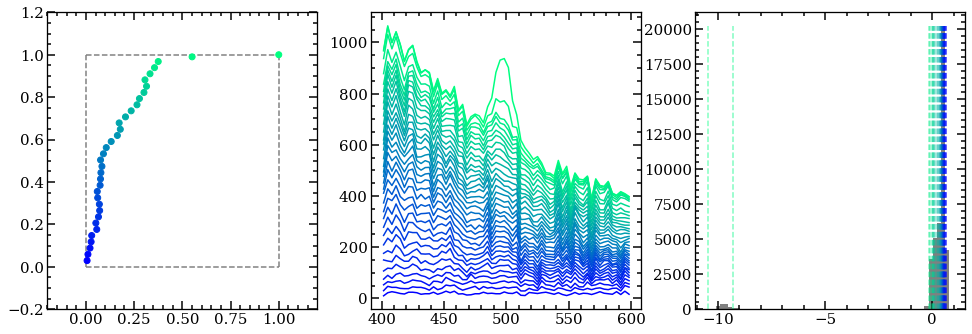

In [44]:
import importlib 
hm = importlib.reload(hm)

fig, ax = plt.subplots(ncols=3,figsize=(15,5))
hm.roc_curve_data(data.v0_ks_mass,-y,bins=60,Npoints=35,ax_roc=ax[0],ax_fits=ax[1],ax_hist=ax[2])

Try and seperate both Ks, La and Lb:

In [150]:
yumap = umap.UMAP(n_components = len(feats))
scaler = StandardScaler()
labels = mc.trueKs+2*mc.trueLa+3*mc.trueLb
emb_mc = yumap.fit_transform(scaler.fit_transform(mc[feats]),y=labels)

C:\Users\jv97\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


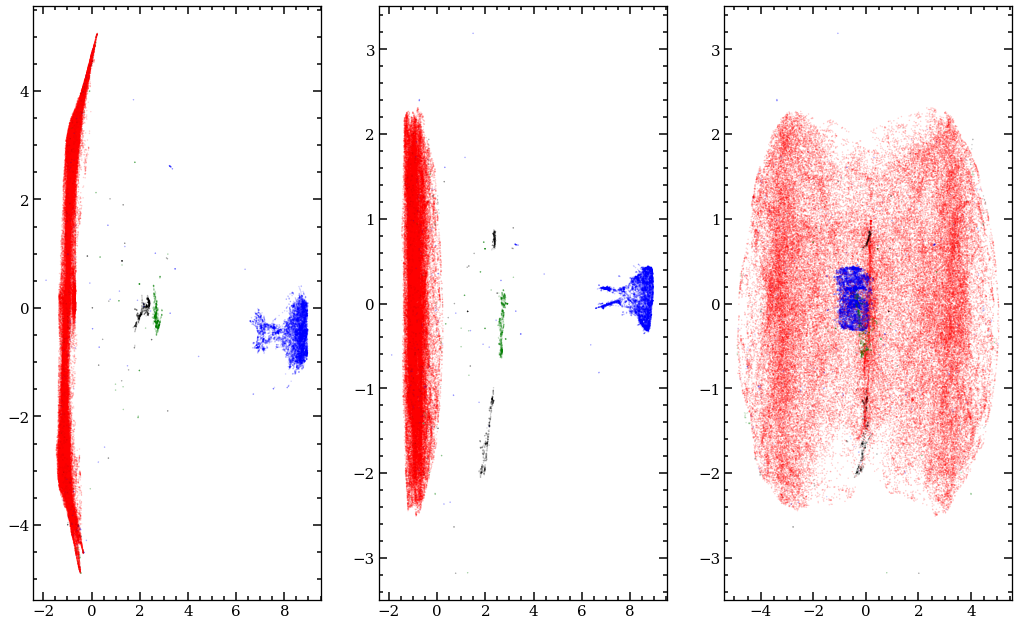

In [157]:
fig, ax = plt.subplots(figsize=(16,10),ncols=3)

pca_emb = PCA().fit_transform(emb_mc)

x,y = pca_emb[:,0], pca_emb[:,1]
ax[0].scatter(x,y,s=0.2,alpha=0.2,c=labels,cmap=matplotlib.colors.ListedColormap(['red','blue','green','k']))

x,y = pca_emb[:,0], pca_emb[:,2]
ax[1].scatter(x,y,s=0.2,alpha=0.2,c=labels,cmap=matplotlib.colors.ListedColormap(['red','blue','green','k']))

x,y = pca_emb[:,1], pca_emb[:,2]
ax[2].scatter(x,y,s=0.2,alpha=0.2,c=labels,cmap=matplotlib.colors.ListedColormap(['red','blue','green','k']))

In [161]:
emb = yumap.transform(scaler.transform(data[feats]))

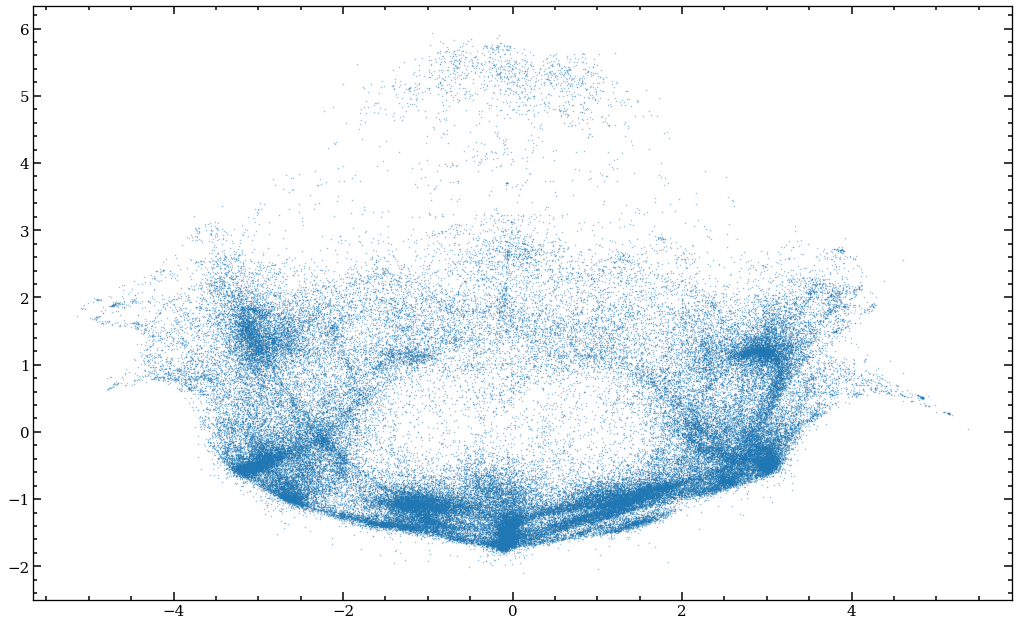

In [164]:
fig, ax = plt.subplots(figsize=(16,10))

pca_emb = PCA().fit_transform(emb)
x,y = pca_emb[:,0], pca_emb[:,1]

# x,y = emb[:,0],emb[:,1]

ax.scatter(x,y,s=0.2,alpha=0.5,cmap=matplotlib.colors.ListedColormap(['red','blue']))

In [ ]:

import importlib 
hm = importlib.reload(hm)

fig, ax = plt.subplots(ncols=3,figsize=(15,5))
hm.roc_curve_data(data.v0_ks_mass,-y,bins=60,Npoints=35,ax_roc=ax[0],ax_fits=ax[1],ax_hist=ax[2])

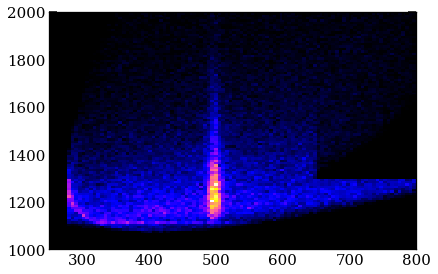

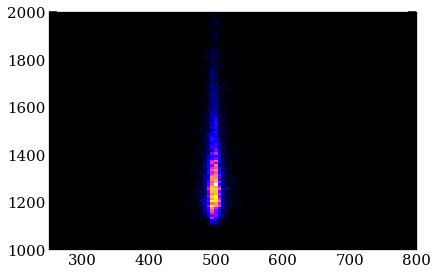

In [137]:
plt.hist2d(mc.v0_ks_mass,mc.v0_la_mass,bins=100,range=[[250,800],[1000,2000]]);
plt.figure()
a = plt.hist2d(mc.v0_ks_mass,mc.v0_la_mass,weights=mc.trueKs,bins=100,range=[[250,800],[1000,2000]]);

In [138]:
# mask = a[0]>20
x = 0.5*(a[1][1:] + a[1][:-1])
y = 0.5*(a[2][1:] + a[2][:-1])
binwx = 
# x = x[mask.sum(1) != 0]
# y = y[mask.sum(0) != 0]

In [147]:
locs = []
for i in range(len(y)):
    for j in range(len(x)):
        if a[0][i,j] > 5:
            locs.append([x[j],y[i]])
locs = np.asarray(locs)

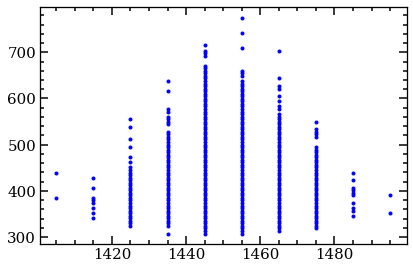

In [148]:
plt.plot(locs[:,1],locs[:,0],'b.')